<a href="https://colab.research.google.com/github/akarshpyr/Akarshcodes12/blob/main/Akarsh_data_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Lets read the dataset
df1 = pd.read_csv('/content/data_clean (1).csv')

In [4]:
df1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [5]:
df1.shape

(158, 10)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


## Data cleaning

In [7]:
df1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

## Note that Temp C is an object datatype which is not correct according to the context

In [8]:
df1.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day',
       'Year', 'Temp', 'Weather'],
      dtype='object')

In [9]:
df1['Year'].value_counts()

2010    158
Name: Year, dtype: int64

In [10]:
df1['Month'].value_counts()

9      34
5      31
7      31
8      31
6      30
May     1
Name: Month, dtype: int64

In [11]:
df1['Day'].value_counts()

1     6
29    6
28    6
27    6
26    6
17    5
30    5
25    5
24    5
23    5
22    5
21    5
20    5
19    5
18    5
16    5
2     5
15    5
14    5
13    5
12    5
11    5
10    5
9     5
8     5
7     5
6     5
5     5
4     5
3     5
31    3
Name: Day, dtype: int64

In [12]:
df1_cl = df1.drop(['Unnamed: 0','Temp C','Year'],axis=1)

In [13]:
df1['Year'].value_counts()

2010    158
Name: Year, dtype: int64

In [14]:
df1_cl

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S
156,14.0,191.0,14.3,9,28,75,S


In [15]:
df1_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Temp     158 non-null    int64  
 6   Weather  155 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 8.8+ KB


In [16]:
df1_cl.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [17]:
dup_df1 = df1_cl[df1_cl.duplicated(keep=False)]

In [18]:
dup_df1

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
150,14.0,191.0,14.3,9,28,75,S
156,14.0,191.0,14.3,9,28,75,S


In [19]:
df1_cl = df1_cl.drop_duplicates(keep='first',ignore_index=True)

In [20]:
df1_cl

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [21]:
df1_cl.tail(10)

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
147,14.0,20.0,16.6,9,25,63,PS
148,30.0,193.0,6.9,9,26,70,C
149,NaN,145.0,13.2,9,27,77,PS
150,14.0,191.0,14.3,9,28,75,S
151,18.0,131.0,8.0,9,29,76,PS
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S
156,18.0,131.0,8.0,9,29,76,C


In [22]:
df1_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar.R  150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    157 non-null    object 
 4   Day      157 non-null    int64  
 5   Temp     157 non-null    int64  
 6   Weather  154 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 8.7+ KB


In [23]:
df1_cl.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [24]:
df1_cl.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Temp         int64
Weather     object
dtype: object

In [25]:
df1_cl['Month'].value_counts()

9      33
5      31
7      31
8      31
6      30
May     1
Name: Month, dtype: int64

In [26]:
df1_cl.loc[df1_cl['Month']=='May']

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
23,32.0,92.0,12.0,May,24,61,C


In [27]:
df1_cl.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Temp         int64
Weather     object
dtype: object

In [28]:
df1_cl['Month'] = df1_cl['Month'].replace('May','5')

In [29]:
df1_cl['Month'].value_counts()

9    33
5    32
7    31
8    31
6    30
Name: Month, dtype: int64

In [30]:
df1_cl['Month'] = pd.to_numeric(df1_cl['Month'])

In [31]:
df1_cl.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int64
Day          int64
Temp         int64
Weather     object
dtype: object

In [32]:
df1_cl

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


## Imputation

In [33]:
df1_cl.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [34]:
df1_cl['Weather'].value_counts()

S     58
C     49
PS    47
Name: Weather, dtype: int64

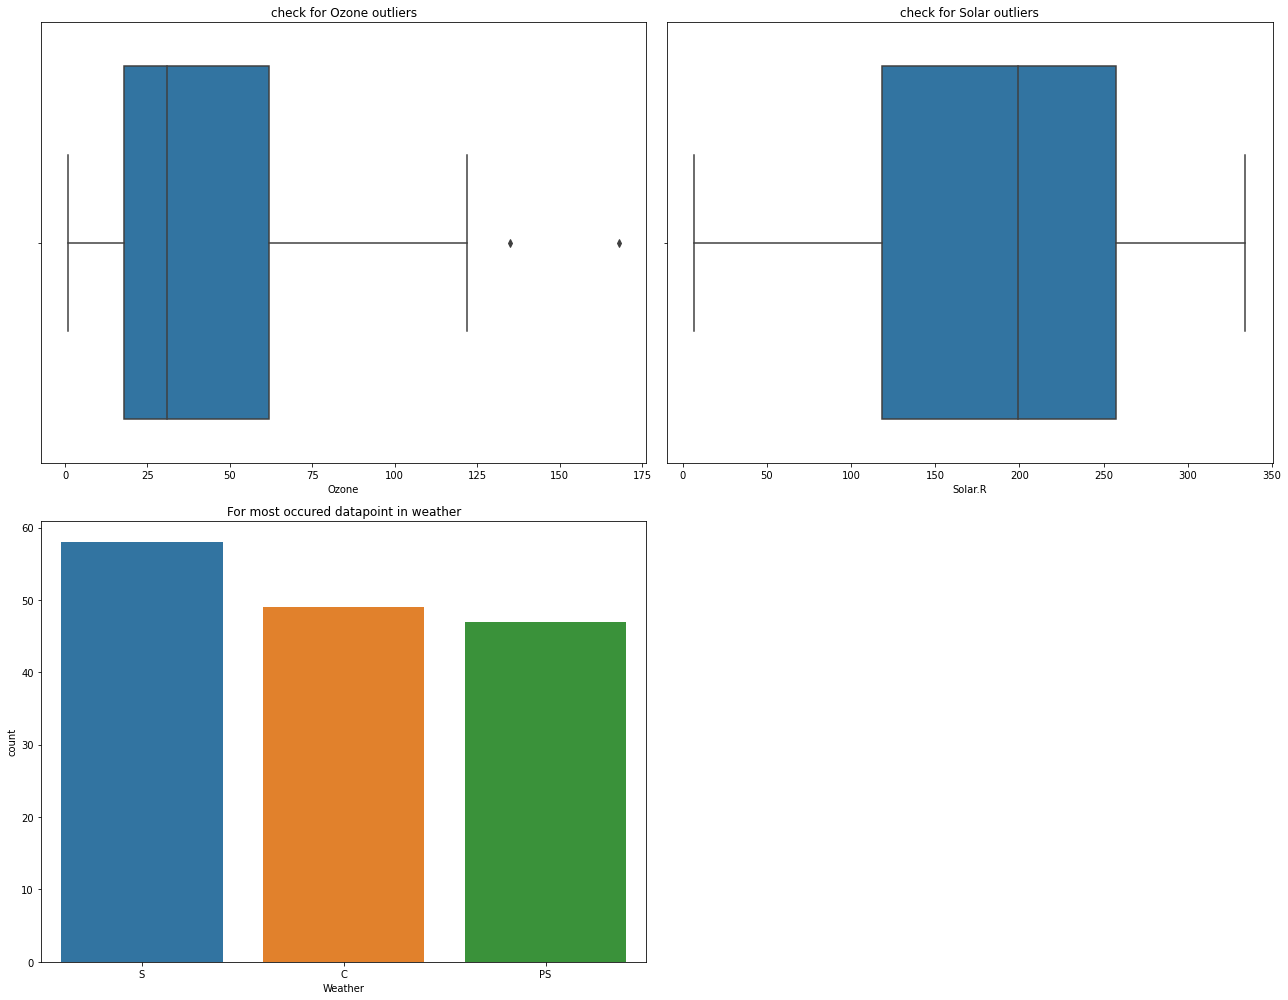

In [35]:
plt.figure(figsize=(18,14))
plt.subplot(2,2,1)
sns.boxplot(df1_cl['Ozone'])
plt.title('check for Ozone outliers')
plt.subplot(2,2,2)
sns.boxplot(df1_cl['Solar.R'])
plt.title('check for Solar outliers')
plt.subplot(2,2,3)
sns.countplot(df1_cl['Weather'])
plt.title('For most occured datapoint in weather')
plt.tight_layout()


In [36]:
df1_cl.describe()

,Ozone,Solar.R,Wind,Month,Day,Temp
count,119.000000,150.000000,157.000000,157.000000,157.000000,157.000000
mean,41.815126,185.366667,9.929936,7.019108,15.929936,77.745223
std,32.659249,89.019146,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,18.000000,118.500000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,199.000000,9.700000,7.000000,16.000000,79.000000
75%,62.000000,257.500000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


In [37]:
df1_cl.median()

Ozone       31.0
Solar.R    199.0
Wind         9.7
Month        7.0
Day         16.0
Temp        79.0
dtype: float64

In [38]:
df1_cl.mode()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,23.0,238.0,11.5,9.0,1,81.0,S
1,NaN,259.0,NaN,NaN,26,NaN,NaN
2,NaN,NaN,NaN,NaN,27,NaN,NaN
3,NaN,NaN,NaN,NaN,29,NaN,NaN


In [39]:
df1_cl['Ozone'] = df1_cl['Ozone'].fillna(31)
df1_cl['Solar.R'] = df1_cl['Solar.R'].fillna(185.366)
df1_cl['Weather'] = df1_cl['Weather'].fillna('S')

In [40]:
df1_cl

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.000,7.4,5,1,67,S
1,36.0,118.000,8.0,5,2,72,C
2,12.0,149.000,12.6,5,3,74,PS
3,18.0,313.000,11.5,5,4,62,S
4,31.0,185.366,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.000,11.5,9,30,68,S
153,41.0,190.000,7.4,5,1,67,C
154,30.0,193.000,6.9,9,26,70,PS
155,31.0,145.000,13.2,9,27,77,S


In [41]:
df1_cl.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Month      0
Day        0
Temp       0
Weather    0
dtype: int64

In [42]:
df1_cl.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int64
Day          int64
Temp         int64
Weather     object
dtype: object

In [43]:
df1_cl = df1_cl.rename({'Solar.R':'Solar'},axis=1)

In [44]:
df1_cl

,Ozone,Solar,Wind,Month,Day,Temp,Weather
0,41.0,190.000,7.4,5,1,67,S
1,36.0,118.000,8.0,5,2,72,C
2,12.0,149.000,12.6,5,3,74,PS
3,18.0,313.000,11.5,5,4,62,S
4,31.0,185.366,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.000,11.5,9,30,68,S
153,41.0,190.000,7.4,5,1,67,C
154,30.0,193.000,6.9,9,26,70,PS
155,31.0,145.000,13.2,9,27,77,S


In [45]:
df1_cl = pd.get_dummies(df1_cl,columns=['Weather'],drop_first=True)

In [46]:
df1_cl

,Ozone,Solar,Wind,Month,Day,Temp,Weather_PS,Weather_S
0,41.0,190.000,7.4,5,1,67,0,1
1,36.0,118.000,8.0,5,2,72,0,0
2,12.0,149.000,12.6,5,3,74,1,0
3,18.0,313.000,11.5,5,4,62,0,1
4,31.0,185.366,14.3,5,5,56,0,1
...,...,...,...,...,...,...,...,...
152,20.0,223.000,11.5,9,30,68,0,1
153,41.0,190.000,7.4,5,1,67,0,0
154,30.0,193.000,6.9,9,26,70,1,0
155,31.0,145.000,13.2,9,27,77,0,1


In [47]:
df1_cl = df1_cl.rename({'Temp':'Temp_Farenheit'},axis=1)

In [48]:
df1_cl

,Ozone,Solar,Wind,Month,Day,Temp_Farenheit,Weather_PS,Weather_S
0,41.0,190.000,7.4,5,1,67,0,1
1,36.0,118.000,8.0,5,2,72,0,0
2,12.0,149.000,12.6,5,3,74,1,0
3,18.0,313.000,11.5,5,4,62,0,1
4,31.0,185.366,14.3,5,5,56,0,1
...,...,...,...,...,...,...,...,...
152,20.0,223.000,11.5,9,30,68,0,1
153,41.0,190.000,7.4,5,1,67,0,0
154,30.0,193.000,6.9,9,26,70,1,0
155,31.0,145.000,13.2,9,27,77,0,1


## Data transformation and Feature scaling

In [49]:
df1_scaled = MinMaxScaler().fit_transform(df1_cl)

In [50]:
df1_cl.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp_Farenheit',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [51]:
df1_scaled = pd.DataFrame(df1_scaled,columns=['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp_Farenheit',
       'Weather_PS', 'Weather_S'])

In [52]:
df1_scaled # values are in between 0 and 1 (Normalization)

,Ozone,Solar,Wind,Month,Day,Temp_Farenheit,Weather_PS,Weather_S
0,0.239521,0.559633,0.300000,0.0,0.000000,0.268293,0.0,1.0
1,0.209581,0.339450,0.331579,0.0,0.033333,0.390244,0.0,0.0
2,0.065868,0.434251,0.573684,0.0,0.066667,0.439024,1.0,0.0
3,0.101796,0.935780,0.515789,0.0,0.100000,0.146341,0.0,1.0
4,0.179641,0.545462,0.663158,0.0,0.133333,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...
152,0.113772,0.660550,0.515789,1.0,0.966667,0.292683,0.0,1.0
153,0.239521,0.559633,0.300000,0.0,0.000000,0.268293,0.0,0.0
154,0.173653,0.568807,0.273684,1.0,0.833333,0.341463,1.0,0.0
155,0.179641,0.422018,0.605263,1.0,0.866667,0.512195,0.0,1.0


In [53]:
df1_stan = StandardScaler().fit_transform(df1_cl)

In [54]:
df1_stan = pd.DataFrame(df1_stan,columns=['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp_Farenheit',
       'Weather_PS', 'Weather_S'])

In [55]:
df1_stan #corresponding z scores from -3 to +3

,Ozone,Solar,Wind,Month,Day,Temp_Farenheit,Weather_PS,Weather_S
0,0.062828,0.053428,-0.724079,-1.412198,-1.668937,-1.146116,-0.653661,1.25450
1,-0.111448,-0.776816,-0.552356,-1.412198,-1.557152,-0.612802,-0.653661,-0.79713
2,-0.947971,-0.419350,0.764184,-1.412198,-1.445367,-0.399476,1.529845,-0.79713
3,-0.738840,1.471762,0.449359,-1.412198,-1.333583,-1.679431,-0.653661,1.25450
4,-0.285723,-0.000007,1.250731,-1.412198,-1.221798,-2.319408,-0.653661,1.25450
...,...,...,...,...,...,...,...,...
152,-0.669130,0.433957,0.449359,1.385469,1.572816,-1.039454,-0.653661,1.25450
153,0.062828,0.053428,-0.724079,-1.412198,-1.668937,-1.146116,-0.653661,-0.79713
154,-0.320578,0.088022,-0.867181,1.385469,1.125678,-0.826128,1.529845,-0.79713
155,-0.285723,-0.465474,0.935906,1.385469,1.237462,-0.079488,-0.653661,1.25450


In [56]:
df1_cl['log_ozone'] = np.log(df1_cl['Ozone'])

In [57]:
df1_cl

,Ozone,Solar,Wind,Month,Day,Temp_Farenheit,Weather_PS,Weather_S,log_ozone
0,41.0,190.000,7.4,5,1,67,0,1,3.713572
1,36.0,118.000,8.0,5,2,72,0,0,3.583519
2,12.0,149.000,12.6,5,3,74,1,0,2.484907
3,18.0,313.000,11.5,5,4,62,0,1,2.890372
4,31.0,185.366,14.3,5,5,56,0,1,3.433987
...,...,...,...,...,...,...,...,...,...
152,20.0,223.000,11.5,9,30,68,0,1,2.995732
153,41.0,190.000,7.4,5,1,67,0,0,3.713572
154,30.0,193.000,6.9,9,26,70,1,0,3.401197
155,31.0,145.000,13.2,9,27,77,0,1,3.433987


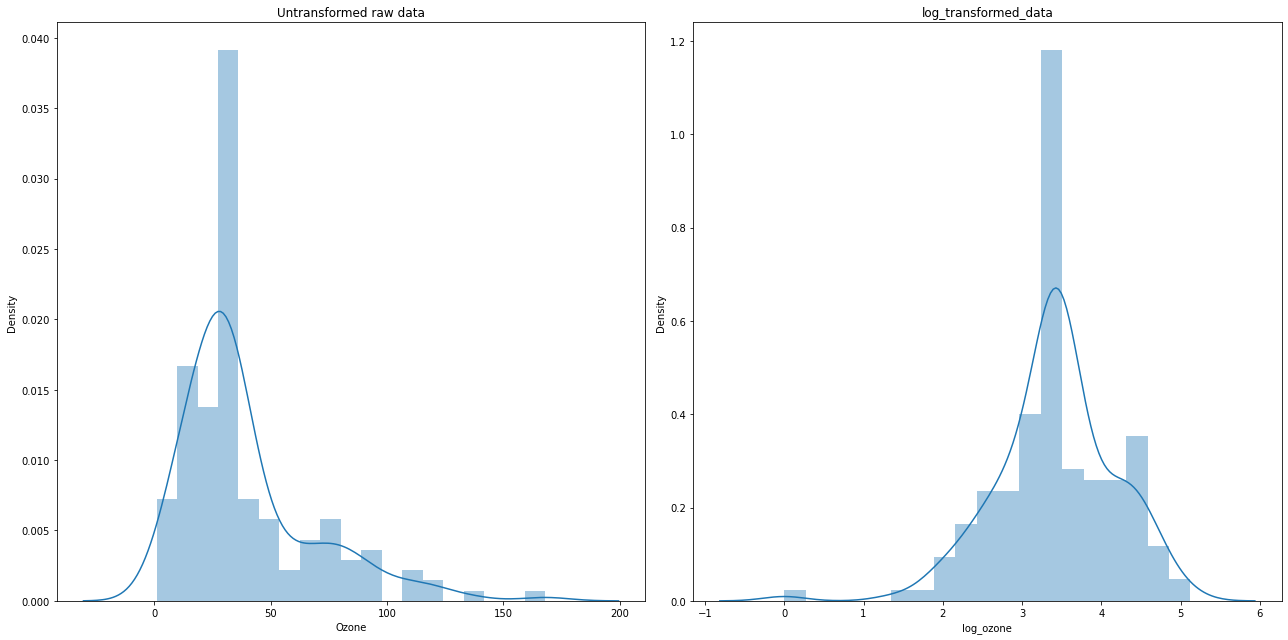

In [58]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
sns.distplot(df1_cl['Ozone'])
plt.title('Untransformed raw data')
plt.subplot(1,2,2)
sns.distplot(df1_cl['log_ozone'])
plt.title('log_transformed_data')
plt.tight_layout()

In [59]:
df1_scaled_tr = MinMaxScaler().fit_transform(df1_cl)

In [60]:
df1_scaled_tr = pd.DataFrame(df1_scaled_tr,columns=['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp_Farenheit',
       'Weather_PS', 'Weather_S','log_ozone'])

In [61]:
df1_scaled_tr

,Ozone,Solar,Wind,Month,Day,Temp_Farenheit,Weather_PS,Weather_S,log_ozone
0,0.239521,0.559633,0.300000,0.0,0.000000,0.268293,0.0,1.0,0.724746
1,0.209581,0.339450,0.331579,0.0,0.033333,0.390244,0.0,0.0,0.699365
2,0.065868,0.434251,0.573684,0.0,0.066667,0.439024,1.0,0.0,0.484958
3,0.101796,0.935780,0.515789,0.0,0.100000,0.146341,0.0,1.0,0.564089
4,0.179641,0.545462,0.663158,0.0,0.133333,0.000000,0.0,1.0,0.670182
...,...,...,...,...,...,...,...,...,...
152,0.113772,0.660550,0.515789,1.0,0.966667,0.292683,0.0,1.0,0.584651
153,0.239521,0.559633,0.300000,0.0,0.000000,0.268293,0.0,0.0,0.724746
154,0.173653,0.568807,0.273684,1.0,0.833333,0.341463,1.0,0.0,0.663782
155,0.179641,0.422018,0.605263,1.0,0.866667,0.512195,0.0,1.0,0.670182


## Actually we have to scale after splitting the dataset because we shoud not fit the test dataset

## Data validation

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x = df1_cl.drop('Ozone',axis=1)
#y = df1_cl['Can we play the cricket match']
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

## How to eliminate duplicate columns

In [64]:
df2 = pd.read_excel('/content/dup_columns.xlsx')

In [65]:
df2

,id,first_name,last_name,age,sex,employee_title,department,Gender,salary,emp_id,Name
0,5,Max,George,26,M,Sales,Sales,M,1300,5,Max
1,13,Katty,Bond,56,F,Manager,Management,F,150000,13,Katty
2,11,Richerd,Gear,57,M,Manager,Management,M,250000,11,Richerd
3,10,Jennifer,Dion,34,F,Sales,Sales,F,1000,10,Jennifer
4,19,George,Joe,50,M,Manager,Management,M,100000,19,George
5,18,Laila,Mark,26,F,Sales,Sales,F,1000,18,Laila
6,20,Sarrah,Bicky,31,F,Senior Sales,Sales,F,2000,20,Sarrah
7,21,Suzan,Lee,34,F,Sales,Sales,F,1300,21,Suzan
8,22,Mandy,John,31,F,Sales,Sales,F,1300,22,Mandy
9,23,Britney,Berry,45,F,Sales,Sales,F,1200,23,Britney


In [66]:
df2.shape

(30, 11)

In [67]:
df2.T.shape

(11, 30)

In [68]:
df2_cl = df2.T.drop_duplicates().T

In [69]:
df2_cl

,id,first_name,last_name,age,sex,employee_title,department,salary
0,5,Max,George,26,M,Sales,Sales,1300
1,13,Katty,Bond,56,F,Manager,Management,150000
2,11,Richerd,Gear,57,M,Manager,Management,250000
3,10,Jennifer,Dion,34,F,Sales,Sales,1000
4,19,George,Joe,50,M,Manager,Management,100000
5,18,Laila,Mark,26,F,Sales,Sales,1000
6,20,Sarrah,Bicky,31,F,Senior Sales,Sales,2000
7,21,Suzan,Lee,34,F,Sales,Sales,1300
8,22,Mandy,John,31,F,Sales,Sales,1300
9,23,Britney,Berry,45,F,Sales,Sales,1200
